In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from gns_utils import prepare_expr_files, csv_log_to_dataframe, split_dataframe, create_experiment_bash_with

EXPR_DIR = Path("gns_experiments")
CKPT_DIR = Path("checkpoints")
all_models = sorted(os.listdir(CKPT_DIR))
all_models

['0010000.pt', '0020000.pt', '0700000.pt', '0750000.pt']

In [2]:
pd.options.mode.chained_assignment = None
DATA_DIR = EXPR_DIR/Path("2_hyperparameters/results")
data = pd.concat([csv_log_to_dataframe(DATA_DIR / file) for file in os.listdir(DATA_DIR)], ignore_index=True)
metadata, parameters, results = split_dataframe(data)

In [18]:
df = data[["b"]]
df["Bb_ratio"] = data["B"] / data["b"]
df[["reps", "runtime (s)", "gns_est"]] = data[["reps", "runtime (s)", "gns_est"]]
df

,b,Bb_ratio,reps,runtime (s),gns_est
0,50,100.0,2,277.734532,3.714135
1,100,100.0,2,477.328461,3.811274
2,100,100.0,5,883.149583,17.253965
3,50,100.0,5,455.947758,2.240862
4,50,10.0,2,90.954725,145.334778
5,100,10.0,2,113.649934,205.045761
6,50,10.0,2,87.484566,77.409424
7,50,100.0,5,476.943043,11.717736
8,100,100.0,5,875.726643,30.147373
9,50,100.0,5,459.393482,15.114058


In [28]:
df2 = df[df["reps"] == 2].groupby(["b", "Bb_ratio"]).mean()
df5 = df[df["reps"] == 5].groupby(["b", "Bb_ratio"]).mean()

In [29]:
df2

reps  runtime (s)    gns_est
b    Bb_ratio                              
50   10.0       2.0    89.430639  43.366918
     100.0      2.0   273.109464   9.314594
100  10.0       2.0   111.668965  89.100929
     100.0      2.0   472.548397  25.385424
1000 10.0       2.0   504.903992  23.357019

In [30]:
df5

reps  runtime (s)    gns_est
b    Bb_ratio                              
50   10.0       5.0   113.471378  59.100749
     100.0      5.0   467.887948  13.309143
100  10.0       5.0   154.824477  44.653783
     100.0      5.0   869.183859  32.859449
1000 10.0       5.0   938.575383  39.281794

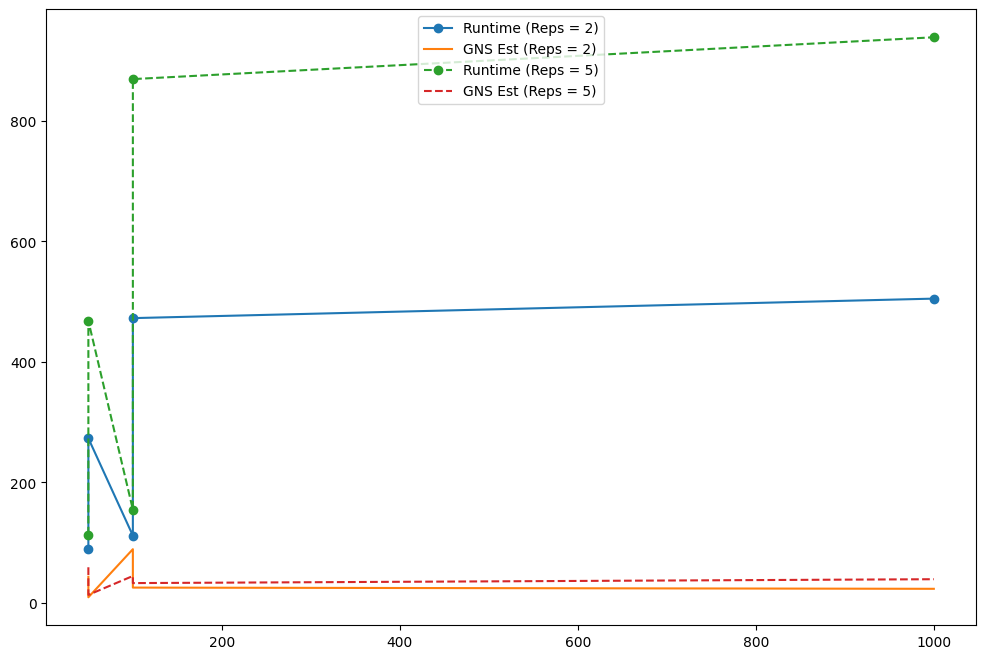

In [47]:
plt.figure(figsize=(12, 8))
plt.title("")

# Extract x and y values separately
x2 = df2.index.get_level_values("b")
x5 = df5.index.get_level_values("b")

y2 = df2["runtime (s)"]
gns2 = df2["gns_est"]
y5 = df5["runtime (s)"]
gns5 = df5["gns_est"]

plt.plot(x2, y2, label="Runtime (Reps = 2)", linestyle="-", marker="o")
plt.plot(x2, gns2, label="GNS Est (Reps = 2)", linestyle="-")
plt.plot(x5, y5, label="Runtime (Reps = 5)", linestyle="--", marker="o")
plt.plot(x5, gns5, label="GNS Est (Reps = 5)", linestyle="--")

plt.legend()
plt.show()

<Axes: >

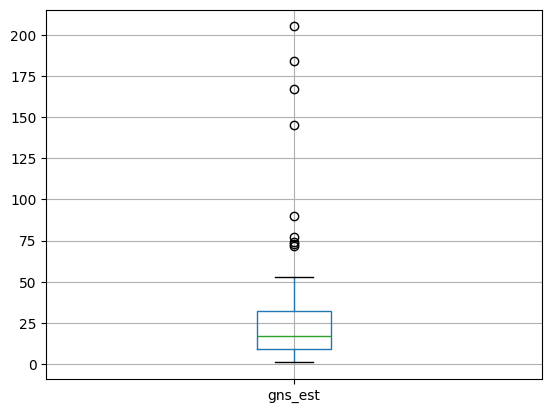

In [45]:
df.boxplot('gns_est')

<Axes: >

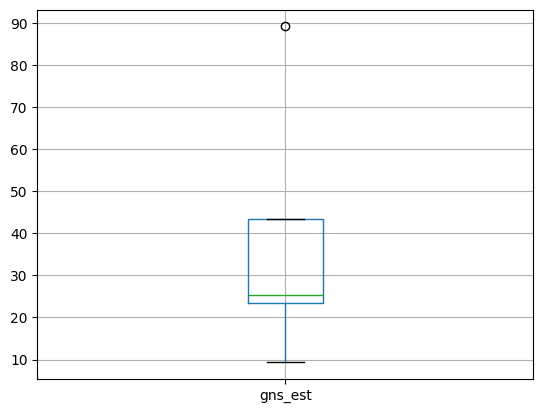

In [44]:
df2.boxplot("gns_est")

<Axes: >

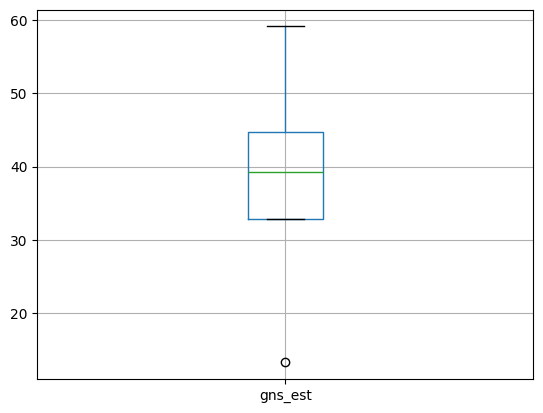

In [43]:
df5.boxplot("gns_est")

In [50]:
lst = [1, 2, 3, 4, 5]
for i in lst[::-1]:
    print(i)

5
4
3
2
1
